# PA006: Credit Card Dataset for Clustering

# International Bank
    O International Bank é um banco internacional que fornece produtos financeiros como empréstimos,
    contas correntes, contas poupança, opções de investimentos,cartões de crédito e etc.

    A cada quarter do ano, os líderes se reúnem para decidir os objetivos da empresa para os próximos 3 meses.

    Nessa última reunião, uma das metas decididas é a criação de uma estratégia de marketing para abordar os clientes que usam cartão de crédito.

    A empresa possui um conjunto de dados sobre o comportamento de uso de aproximadamente 9000 usuários de cartão de crédito ativos,
    durante os últimos 6 meses e o arquivo está no nível de clientes e possui 18 variáveis comportamentais.

# 0.0 Planejamento da Solução

## Input

        1. Problema de negócio

        -> criação de uma estratégia de marketing para abordar os clientes que usam cartão de crédito.

        2. Conjunto de dados

        -> A empresa possui um conjunto de dados sobre o comportamento de
         uso de aproximadamente 9000 usuários de cartão de crédito ativos, durante os últimos 6 meses

## Output

1 - Definir uma  estratégia de marketing ideal para cada tipo de cliente

    -> Relatório com as respostas das perguntas do negócio

            1. Qual tipo de marketing ideal para cada grupo de clientes?
            2. Quais serão os grupos de clientes?
            3. Qual grupo de clientes é mais rentável?
            4. Qual grupo de clientes possui a maior frequencia de compras?
            5. Qual grupo de cliente gastam mais?
            6. Clientes mais antigos gastam mais?
            7. Clientes pagam a fatura cheia ou parcelada?
            8. Clientes com maior limite de credito gastam mais ?
            9. Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tasks

    1 - Criar uma segmentação de clientes baseado em critérios claros de seleção.

    2 - Tornar a segmentação de clientes acessível para o time de operações.

    3 - Ensinar o time de operações sobre como usar a sua solução.

    4 - Transferir o conhecimento para os Cientistas de Dados da International Bank.

    5 - Recomendar 2-3 alavancas de negócio para cada segmento de clientes

## Benchmark de Soluções

How Do Credit Card Companies Make Money?

interest -> Issuers typically charge interest only when you carry a balance from month to month.
    
fees charged to cardholders -> Annual fees / Cash advance fees / Balance transfer fees / Late fees

transaction fees paid by businesses that accept credit cards. -> interchange,” and is usually about 1% to 3% of the transaction.


## Data Field

CUSTID: Identification of Credit Card holder (Categorical)

BALANCE: Balance amount left in their account to make purchases

BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES: Amount of purchases made from account

ONEOFFPURCHASES: Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES: Amount of purchase done in installment

CASHADVANCE: Cash in advance given by the user

PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) -----> purchases_frequency = purchases_trx  / tenure <-----

ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance being paid -----> cash_advance_frequency = cash_advance_trx / tenure <-----

CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"

PURCHASESTRX: Number of purchase transactions made

CREDITLIMIT: Limit of Credit Card for userPAYMENTS: Amount of Payment done by user

MINIMUM_PAYMENTS: Minimum amount of payments made by user

PRCFULLPAYMENT: Percent of full payment paid by user

TENURE: Tenure of credit card service for user

# 0.0. Imports

In [1]:
import pandas as pd
import numpy as np
import inflection
import seaborn as sns

from sklearn import cluster as c
from sklearn import metrics as m

from matplotlib import pyplot as plt

## 0.1. Loading data

In [2]:
df_raw = pd.read_csv('C:/Users/DML1WFE/repos/projects/pa006_bank_marketing_strategy/bank_marketing_stretegy/data/raw/CCGENERAL.csv')

# 1.0. Data Description

In [3]:
df01 = df_raw.copy()

## 1.1. Columns Rename

In [4]:
old_cols = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
            'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
            'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
            'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
            'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, old_cols))

#rename
df01.columns = cols_new

## 1.2. Data Dimensions

In [5]:
print ('Number of rows: {}'.format(df01.shape[0]))
print ('Number os columns:{}'.format(df01.shape[1]))

Number of rows: 8950
Number os columns:18


## 1.3. Data Types

In [6]:
df01.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

## 1.4. Check Missing Values

In [7]:
df01.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [8]:
df01.isna().sum() / df01.shape[0]

cust_id                             0.000000
balance                             0.000000
balance_frequency                   0.000000
purchases                           0.000000
oneoff_purchases                    0.000000
installments_purchases              0.000000
cash_advance                        0.000000
purchases_frequency                 0.000000
oneoff_purchases_frequency          0.000000
purchases_installments_frequency    0.000000
cash_advance_frequency              0.000000
cash_advance_trx                    0.000000
purchases_trx                       0.000000
credit_limit                        0.000112
payments                            0.000000
minimum_payments                    0.034972
prc_full_payment                    0.000000
tenure                              0.000000
dtype: float64

## 1.5. Replace Missing Values

In [9]:
df01 = df01.dropna()

In [10]:
df01.isna().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

## 1.6. Descriptive Statistics

In [11]:
num_attributes = df01.select_dtypes(include = ['float64', 'int64'])
cat_attributes = df01.select_dtypes(exclude = ['float64', 'int64', 'datetime64[ns]'])

### 1.6.1. Numerical Attributes

In [69]:
# estimadores de localicação
est1 = pd.DataFrame(num_attributes.apply(np.mean)).T
est2 = pd.DataFrame(num_attributes.apply(np.median)).T
est3 = pd.DataFrame(num_attributes.apply(np.min)).T
est4 = pd.DataFrame(num_attributes.apply(np.max)).T

# estimadores de variabilidade
est5 = pd.DataFrame(num_attributes.apply(np.std)).T
est6 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T

# skewness and kurtosis
est7 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() )).T
est8 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis())).T

# conatenate
m1 = pd.concat([est3, est4, est6, est1, est2, est5, est7, est8]).T.reset_index()
m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std deviation', 'skewness', 'kurtosis']
m1

# percentis
quartis = num_attributes.apply( lambda x: np.quantile( x, q=[0.10, 0.25, 0.50, 0.75, 0.95, 0.99])).T.reset_index()
quartis.columns = ['attributes', 'P10', 'P25', 'P50', 'P75', 'P95', 'P99']

#
m2 = pd.merge(m1, quartis, how='inner', on='attributes')
m2

,attributes,min,max,range,mean,median,std deviation,skewness,kurtosis,P10,P25,P50,P75,P95,P99
0,balance,0.000000,19043.13856,19043.138560,1601.224893,916.855459,2095.449969,2.374254,7.553876,29.093764,148.095189,916.855459,2105.195853,5936.635587,9369.550879
1,balance_frequency,0.000000,1.00000,1.000000,0.895035,1.000000,0.207685,-2.084161,3.369586,0.545455,0.909091,1.000000,1.000000,1.000000,1.000000
2,purchases,0.000000,49039.57000,49039.570000,1025.433874,375.405000,2166.982511,8.055789,108.677684,0.000000,43.367500,375.405000,1145.980000,4060.092500,9127.092000
3,oneoff_purchases,0.000000,40761.25000,40761.250000,604.901438,44.995000,1684.210284,9.935776,160.121308,0.000000,0.000000,44.995000,599.100000,2728.372500,6783.896500
4,installments_purchases,0.000000,22500.00000,22500.000000,420.843533,94.785000,917.192075,7.216133,94.193373,0.000000,0.000000,94.785000,484.147500,1800.000000,3916.483000
5,cash_advance,0.000000,47137.21176,47137.211760,994.175523,0.000000,2121.335473,5.139629,52.143523,0.000000,0.000000,0.000000,1132.385490,4721.415498,9681.634354
6,purchases_frequency,0.000000,1.00000,1.000000,0.496000,0.500000,0.401249,0.033041,-1.638001,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000
7,oneoff_purchases_frequency,0.000000,1.00000,1.000000,0.205909,0.083333,0.300036,1.504234,1.058206,0.000000,0.000000,0.083333,0.333333,1.000000,1.000000
8,purchases_installments_frequency,0.000000,1.00000,1.000000,0.368820,0.166667,0.398070,0.487753,-1.419279,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000
9,cash_advance_frequency,0.000000,1.50000,1.500000,0.137604,0.000000,0.201780,1.795915,3.184233,0.000000,0.000000,0.000000,0.250000,0.583333,0.833333


### 1.6.2. Categorical Attributes

<AxesSubplot:xlabel='purchases_trx', ylabel='Density'>

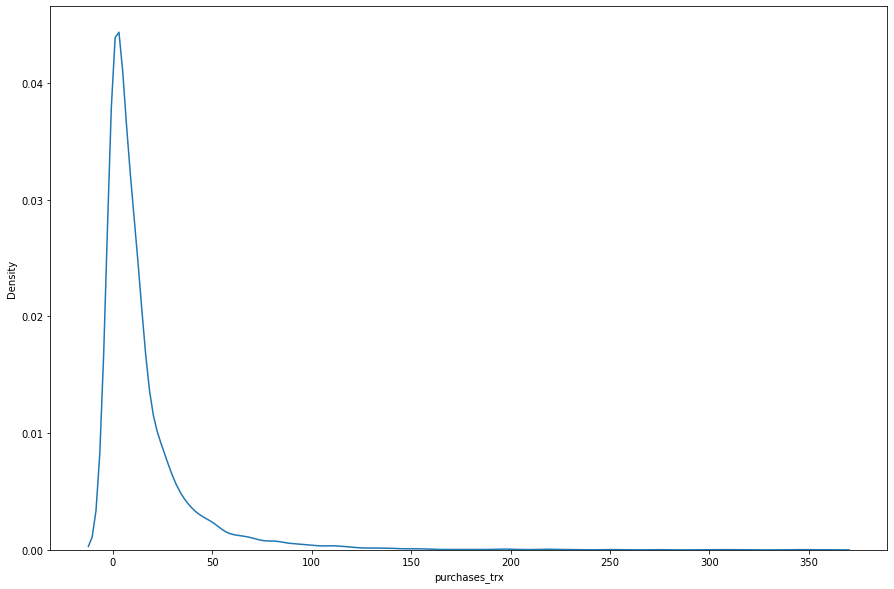

In [74]:
plt.figure(figsize=(15,10))
sns.kdeplot(num_attributes['purchases_trx'])

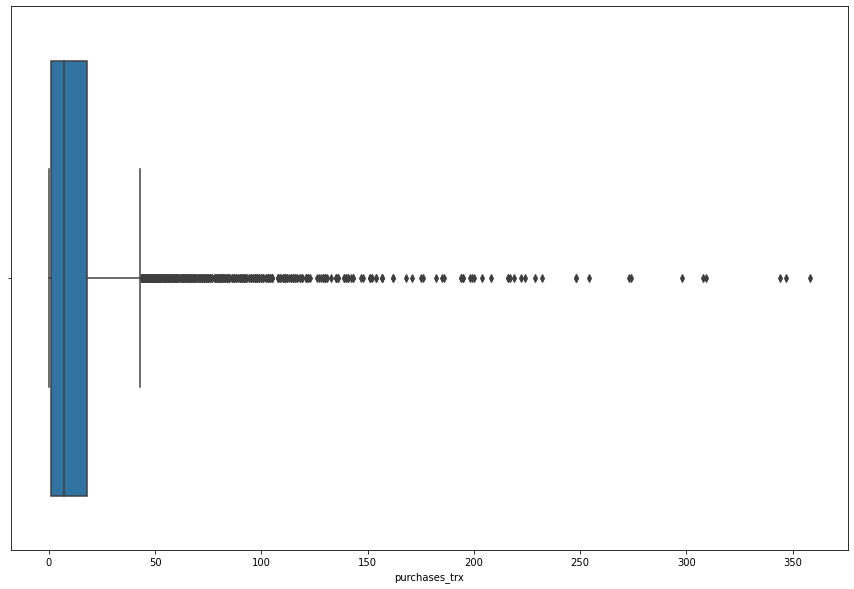

In [75]:
plt.figure(figsize=(15,10))
sns.boxplot(x='purchases_trx', data= num_attributes);

In [76]:
np.quantile(num_attributes['purchases_trx'], q=[0.25, 0.50, 0.75])

array([ 1.,  7., 18.])

In [41]:
q3 = 6500
q2 = 3000
q1 = 1600

q3 - 1.5 *( q3-q1)

-850.0

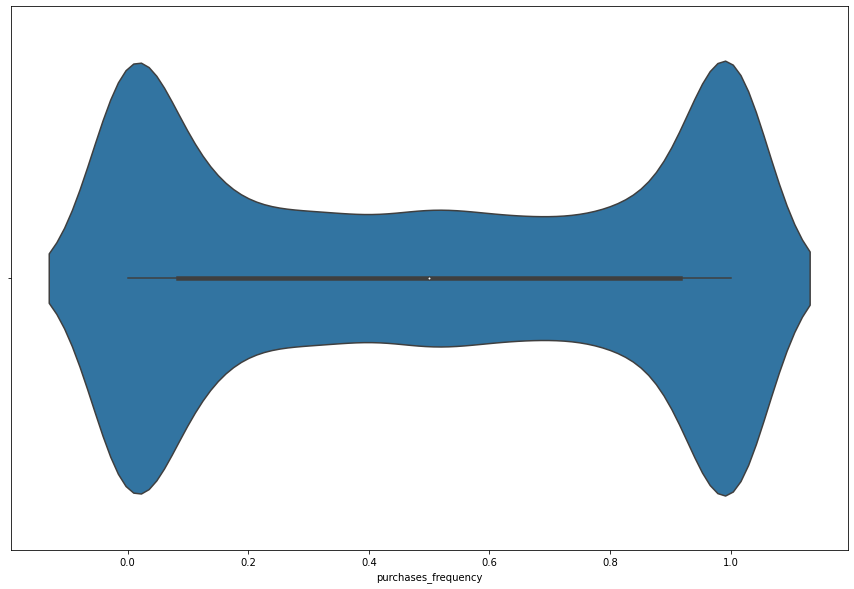

In [72]:
plt.figure(figsize=(15,10))
sns.violinplot(x='purchases_frequency', data= num_attributes);

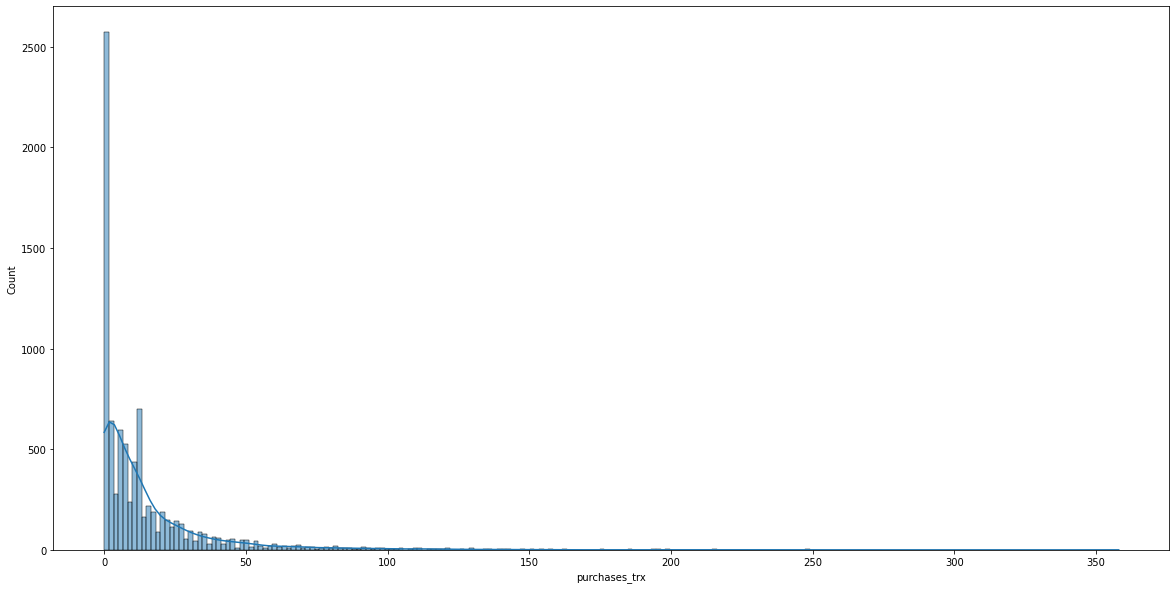

In [77]:
plt.figure(figsize=(20,10))
sns.histplot(x='purchases_trx', data= num_attributes, kde=True);

# 2.0. Data Filtering

In [78]:
df20 = df01.copy()

# 3.0. Feature Engineering

In [ ]:
df30 = 

# 4.0. EDA - Space Study

# 5.0. Data Preparation

# 6.0. Feature Selection

In [ ]:
cols_drop = ['cust_id']
X = df01.drop(columns = cols_drop)

# 7.0. - Hyperparameter Fine-Tunning

## 7.1. K-Means

In [ ]:
clusters = [2, 3, 4, 5, 6, 7, 8]

silhouette_list = []
davies_list = []

for k in clusters:
    # model definition
    kmeans_model = c.KMeans (n_clusters = k)

    # model training
    kmeans_model.fit(X)

    # model predict
    labels = kmeans_model.predict(X)

    # model performance
    sil = m.silhouette_score( X, labels)
    dav = m.davies_bouldin_score( X, labels)
    silhouette_list.append(sil)
    davies_list.append(dav)

Text(0.5, 1.0, 'Silhouette Sore')

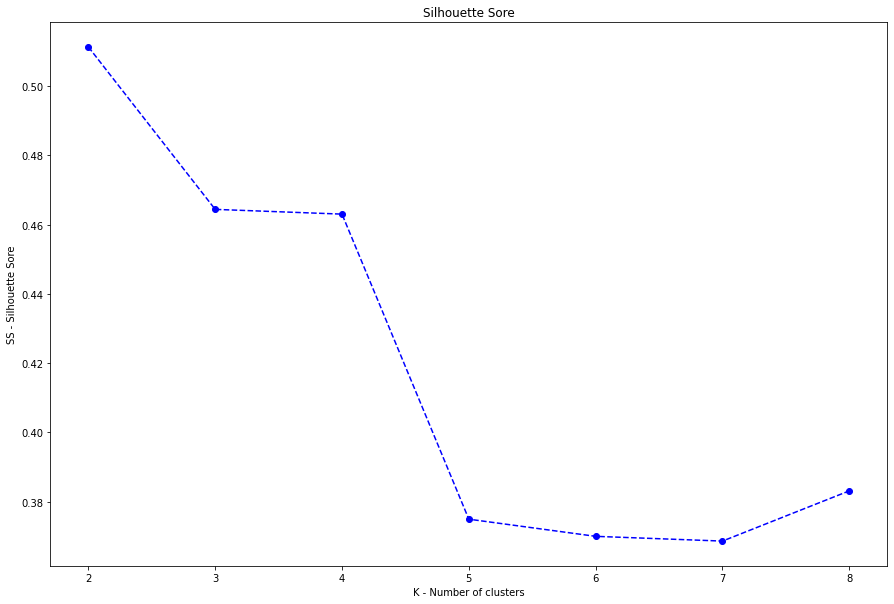

In [ ]:
plt.figure( figsize=(15, 10 ))
plt.plot( clusters, silhouette_list, linestyle = '--', marker = 'o', color = 'b');
plt.xlabel('K - Number of clusters')
plt.ylabel( 'SS - Silhouette Sore')
plt.title( 'Silhouette Sore')

Text(0.5, 1.0, 'DB Index')

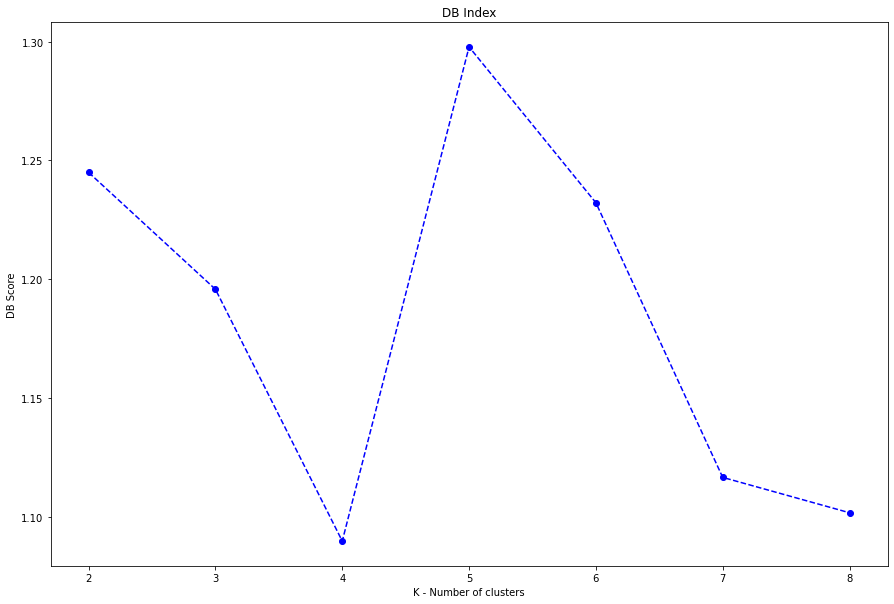

In [ ]:
plt.figure( figsize=(15, 10 ))
plt.plot( clusters, davies_list, linestyle = '--', marker = 'o', color = 'b');
plt.xlabel('K - Number of clusters')
plt.ylabel( 'DB Score')
plt.title( 'DB Index')

# 8.0. Machine Learning Training

# 9.0. Clustering Analysis

# 10.0. EDA - Insight Reports

# 11.0. Deploy to Production